In [2]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("ebay_items_with_full_embeddings.csv")

print(df.shape)
df.head(1)

(10000, 14)


,query,item_id,title,price,currency,condition,seller,feedback_score,image_url,item_url,item_creation_date,text_embedding,image_path,image_embedding
0,laptop,v1|396320750534|0,"CHUWI- 13.3"" Laptop - Intel Celeron 2.8GH- 8GB...",134.39,USD,New,chuwiofficial,413,https://i.ebayimg.com/images/g/ZysAAOSwXDpmIQc...,https://www.ebay.com/itm/396320750534?_skw=lap...,2025-03-15T01:18:10.000Z,"[-0.06598962843418121, -0.025627294555306435, ...",images/v1_396320750534_0.jpg,"0.011063453741371632,0.05142253637313843,0.006..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   query               10000 non-null  object 
 1   item_id             10000 non-null  object 
 2   title               10000 non-null  object 
 3   price               10000 non-null  float64
 4   currency            10000 non-null  object 
 5   condition           10000 non-null  object 
 6   seller              10000 non-null  object 
 7   feedback_score      10000 non-null  int64  
 8   image_url           9984 non-null   object 
 9   item_url            10000 non-null  object 
 10  item_creation_date  10000 non-null  object 
 11  text_embedding      10000 non-null  object 
 12  image_path          9984 non-null   object 
 13  image_embedding     9984 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,price,feedback_score
count,10000.000000,1.000000e+04
mean,250.571678,4.018264e+04
std,474.091359,1.255151e+05
min,0.990000,-2.000000e+00
25%,65.000000,4.370000e+02
50%,139.000000,3.785500e+03
75%,269.000000,1.843375e+04
max,28000.000000,1.048668e+06


In [8]:
df.isnull().sum()

query                  0
item_id                0
title                  0
price                  0
currency               0
condition              0
seller                 0
feedback_score         0
image_url             16
item_url               0
item_creation_date     0
text_embedding         0
image_path            16
image_embedding       16
dtype: int64

In [12]:
def parse_embedding(x):
    # If it's already a list or array, just return it
    if isinstance(x, (list, np.ndarray)):
        return x
    # If it's a scalar NaN
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return np.nan
    # If it's a string, try to parse
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            try:
                return [float(i) for i in x.split(",") if i.strip()]
            except:
                return np.nan
    # Anything else fallback
    return np.nan

# Apply safely
df["text_embedding"] = df["text_embedding"].apply(parse_embedding)
df["image_embedding"] = df["image_embedding"].apply(parse_embedding)


In [13]:
# How many embeddings are still NaN?
print(df["text_embedding"].isna().sum())
print(df["image_embedding"].isna().sum())

# Example lengths
print(df["text_embedding"].dropna().apply(len).value_counts())
print(df["image_embedding"].dropna().apply(len).value_counts())


0
16
text_embedding
384    10000
Name: count, dtype: int64
image_embedding
512    9984
Name: count, dtype: int64


In [14]:
X_text = np.vstack(df["text_embedding"].dropna().values)
X_image = np.vstack(df["image_embedding"].dropna().values)
print(X_text.shape, X_image.shape)

(10000, 384) (9984, 512)


In [ ]:
df = df.dropna(subset=["image_embedding"])

df.shape

(9984, 14)

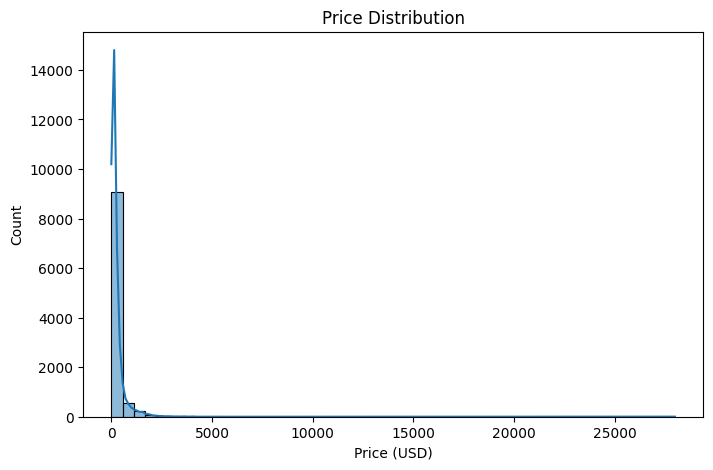

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price (USD)")
plt.show()

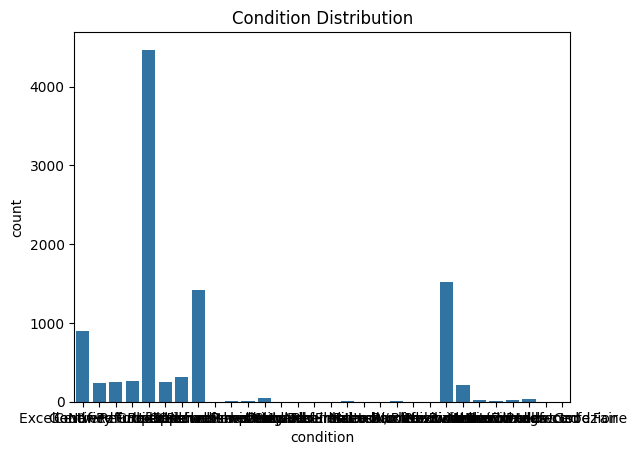

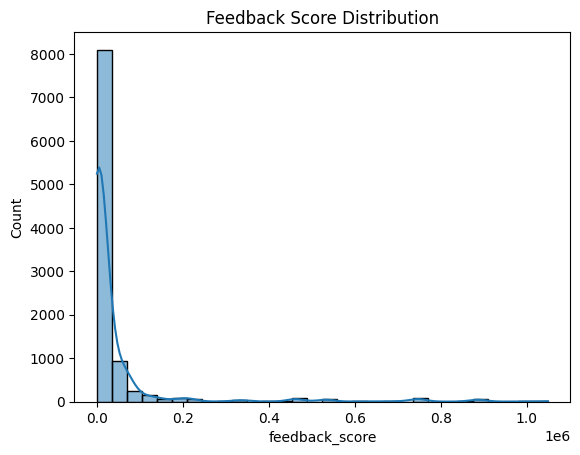

In [18]:
sns.countplot(x="condition", data=df)
plt.title("Condition Distribution")
plt.show()

sns.histplot(df["feedback_score"], bins=30, kde=True)
plt.title("Feedback Score Distribution")
plt.show()


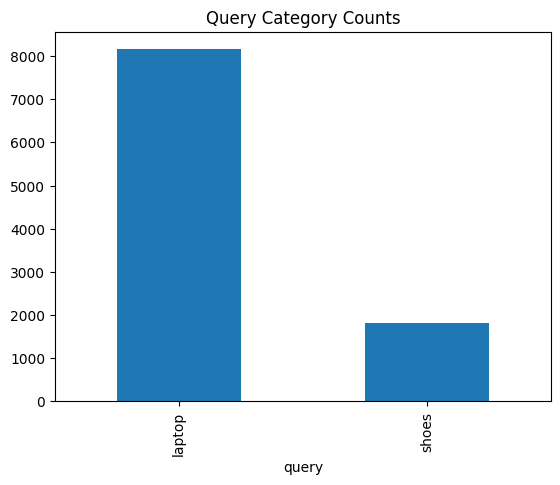

In [19]:
df["query"].value_counts().plot(kind="bar")
plt.title("Query Category Counts")
plt.show()

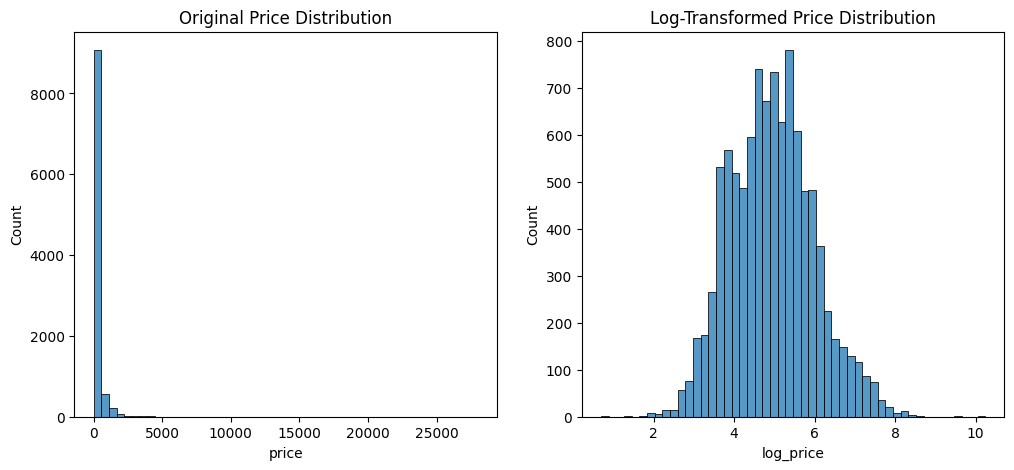

In [20]:
# Log-transform price
df["log_price"] = np.log1p(df["price"])  # log1p handles zero prices

# Plot original vs log-transformed
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["price"], bins=50, ax=axes[0])
axes[0].set_title("Original Price Distribution")
sns.histplot(df["log_price"], bins=50, ax=axes[1])
axes[1].set_title("Log-Transformed Price Distribution")
plt.show()


c:\Users\alnic\Downloads\projects\projects\SnapValue\price-predictor\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\alnic\Downloads\projects\projects\SnapValue\price-predictor\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


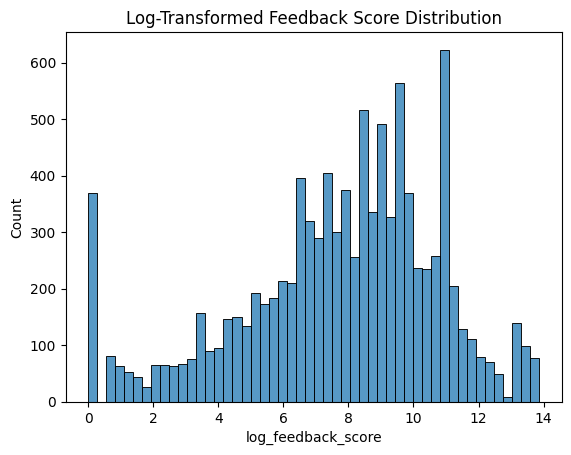

In [22]:
df["log_feedback_score"] = np.log1p(df["feedback_score"])
sns.histplot(df["log_feedback_score"], bins=50)
plt.title("Log-Transformed Feedback Score Distribution")
plt.show()


<Axes: xlabel='feedback_tier', ylabel='count'>

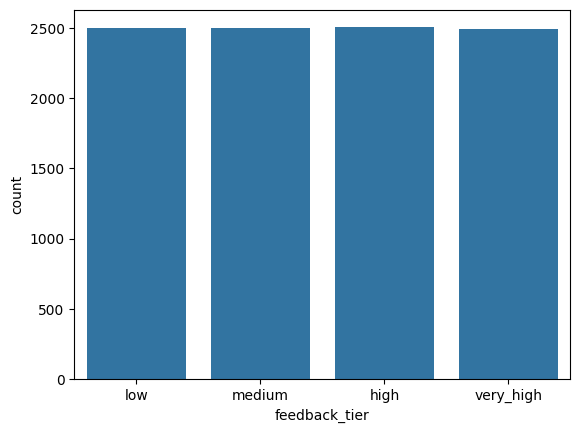

In [23]:
df["feedback_tier"] = pd.qcut(df["feedback_score"], q=4, labels=["low","medium","high","very_high"])
sns.countplot(x="feedback_tier", data=df)

In [24]:
print(df["price"].describe())
print(df["log_price"].describe())
print(df["feedback_score"].describe())
print(df["log_feedback_score"].describe())

count     9984.000000
mean       250.559353
std        474.197455
min          0.990000
25%         65.000000
50%        139.000000
75%        269.000000
max      28000.000000
Name: price, dtype: float64
count    9984.000000
mean        4.939787
std         1.038062
min         0.688135
25%         4.189655
50%         4.941642
75%         5.598422
max        10.239996
Name: log_price, dtype: float64
count    9.984000e+03
mean     4.005202e+04
std      1.254042e+05
min     -2.000000e+00
25%      4.355000e+02
50%      3.734500e+03
75%      1.836300e+04
max      1.048668e+06
Name: feedback_score, dtype: float64
count    9982.000000
mean            -inf
std              NaN
min             -inf
25%         6.080505
50%         8.228443
75%         9.818148
max        13.863032
Name: log_feedback_score, dtype: float64


c:\Users\alnic\Downloads\projects\projects\SnapValue\price-predictor\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [25]:
print(np.histogram(df["price"], bins=10))
print(np.histogram(df["log_price"], bins=10))

(array([9956,   26,    0,    0,    1,    0,    0,    0,    0,    1]), array([9.9000000e-01, 2.8008910e+03, 5.6007920e+03, 8.4006930e+03,
       1.1200594e+04, 1.4000495e+04, 1.6800396e+04, 1.9600297e+04,
       2.2400198e+04, 2.5200099e+04, 2.8000000e+04]))
(array([   2,   41,  739, 2698, 3549, 2154,  646,  149,    4,    2]), array([ 0.68813464,  1.64332073,  2.59850681,  3.5536929 ,  4.50887898,
        5.46406507,  6.41925116,  7.37443724,  8.32962333,  9.28480942,
       10.2399955 ]))


In [26]:


# -----------------------------
# 1. Clean feedback_score
# -----------------------------
# Replace negatives and zeros with 1 (so log is defined)
df['feedback_score'] = df['feedback_score'].clip(lower=1)

# Create log version
df['log_feedback_score'] = np.log(df['feedback_score'])

# -----------------------------
# 2. Handle price
# -----------------------------
# Optional: clip extreme high prices at 99th percentile
price_99 = df['price'].quantile(0.99)
df['price_clipped'] = df['price'].clip(upper=price_99)

# Log-transform
df['log_price'] = np.log(df['price_clipped'])

# -----------------------------
# 3. Fill missing image embeddings
# -----------------------------
# For image_embedding, fill missing with zeros of same length (512)
embedding_dim = 512
df['image_embedding'] = df['image_embedding'].apply(
    lambda x: x if isinstance(x, list) else [0.0]*embedding_dim
)

# For image_path or image_url, you can fill with placeholder if needed
df['image_path'] = df['image_path'].fillna('missing_image.jpg')
df['image_url'] = df['image_url'].fillna('missing_url')

# -----------------------------
# 4. Optional: check distributions
# -----------------------------
print(df['log_price'].describe())
print(df['log_feedback_score'].describe())


count    9984.000000
mean        4.924538
std         1.039524
min        -0.010050
25%         4.174387
50%         4.934474
75%         5.594711
max         7.506137
Name: log_price, dtype: float64
count    9984.000000
mean        7.721137
std         3.137804
min         0.000000
25%         6.076493
50%         8.225368
75%         9.818093
max        13.863031
Name: log_feedback_score, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from tqdm.auto import tqdm
import xgboost as xgb

tqdm.pandas()  # add progress bars to pandas apply

# -----------------------
# 1. Fill missing embeddings
# -----------------------
df["image_embedding"] = df["image_embedding"].progress_apply(lambda x: x if isinstance(x, list) else [0.0]*512)

# -----------------------
# 2. Date features
# -----------------------
df["item_creation_date"] = pd.to_datetime(df["item_creation_date"])
df["item_year"] = df["item_creation_date"].dt.year
df["item_month"] = df["item_creation_date"].dt.month
df["item_dayofweek"] = df["item_creation_date"].dt.dayofweek

# -----------------------
# 3. Feature setup
# -----------------------
numeric_features = ["log_feedback_score", "item_year", "item_month", "item_dayofweek"]
categorical_features = ["condition", "currency", "seller"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough"  # keep embeddings for concatenation
)

# -----------------------
# 4. Extract embeddings
# -----------------------
text_emb = np.stack(df["text_embedding"].values)
image_emb = np.stack(df["image_embedding"].values)
embedding_features = np.hstack([text_emb, image_emb])  # shape: (N, 896)

# -----------------------
# 5. Split dataset
# -----------------------
X_base = preprocessor.fit_transform(df)
X = np.hstack([X_base, embedding_features])
y = df["log_price"].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# -----------------------
# 6. Cross-validation setup
# -----------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# -----------------------
# 7. Training with tqdm + XGBoost
# -----------------------
cv_scores = []
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
    X_tr, X_va = X_train[train_idx], X_train[val_idx]
    y_tr, y_va = y_train[train_idx], y_train[val_idx]
    
    model = xgb.XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        tree_method="gpu_hist"  # if using GPU, else "hist"
    )
    
    model.fit(
        X_tr, y_tr,
        eval_set=[(X_va, y_va)],
        eval_metric="rmse",
        verbose=False,
        callbacks=[xgb.callback.EarlyStopping(rounds=20)]
    )
    
    y_pred = model.predict(X_va)
    rmse = mean_squared_error(y_va, y_pred, squared=False)
    cv_scores.append(rmse)
    print(f"Fold {fold}: RMSE = {rmse:.4f}")

print("CV RMSE mean:", np.mean(cv_scores))
print("CV RMSE std:", np.std(cv_scores))

# -----------------------
# 8. Final evaluation on test set
# -----------------------
final_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    tree_method="gpu_hist"
)
final_model.fit(X_train, y_train)
y_test_pred = final_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print("Test RMSE:", test_rmse)


In [ ]:
# -----------------------
# 1. Compute sample weights
# -----------------------
# Assuming 'query' indicates category: 'laptop', 'shoes', etc.
category_counts = df['query'].value_counts()
category_weights = {cat: 1/count for cat, count in category_counts.items()}

# Assign a weight to each sample
sample_weights = df['query'].map(category_weights).values

# -----------------------
# 2. Split dataset with weights
# -----------------------
X_train, X_temp, y_train, y_temp, w_train, w_temp = train_test_split(
    X, y, sample_weights, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test, w_val, w_test = train_test_split(
    X_temp, y_temp, w_temp, test_size=0.5, random_state=42
)

# -----------------------
# 3. Train with XGBoost + weights
# -----------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
    X_tr, X_va = X_train[train_idx], X_train[val_idx]
    y_tr, y_va = y_train[train_idx], y_train[val_idx]
    w_tr, w_va = w_train[train_idx], w_train[val_idx]
    
    model = xgb.XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        tree_method="gpu_hist"
    )
    
    model.fit(
        X_tr, y_tr,
        sample_weight=w_tr,
        eval_set=[(X_va, y_va)],
        sample_weight_eval_set=[w_va],
        eval_metric="rmse",
        verbose=False,
        callbacks=[xgb.callback.EarlyStopping(rounds=20)]
    )
    
    y_pred = model.predict(X_va)
    rmse = mean_squared_error(y_va, y_pred, squared=False)
    cv_scores.append(rmse)
    print(f"Fold {fold}: RMSE = {rmse:.4f}")

print("CV RMSE mean:", np.mean(cv_scores))
print("CV RMSE std:", np.std(cv_scores))

# -----------------------
# 4. Final evaluation on test set
# -----------------------
final_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    tree_method="gpu_hist"
)
final_model.fit(X_train, y_train, sample_weight=w_train)
y_test_pred = final_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print("Test RMSE:", test_rmse)


In [ ]:
import matplotlib.pyplot as plt

# Compute sum of weights per category
weight_sums = df['query'].map(category_weights)
weight_sums_per_category = df.groupby('query')['query'].apply(
    lambda x: weight_sums[x.index].sum()
)

# Sort for nicer plotting
weight_sums_per_category = weight_sums_per_category.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
plt.bar(weight_sums_per_category.index, weight_sums_per_category.values, color='skyblue')
plt.title("Weighted Contribution of Each Category")
plt.ylabel("Sum of Sample Weights")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Original counts per category
counts = df['query'].value_counts().sort_index()

# Weighted sums per category
weight_sums = df['query'].map(category_weights)
weighted_sums = df.groupby('query')['query'].apply(lambda x: weight_sums[x.index].sum()).sort_index()

# Plot side by side
x = np.arange(len(counts))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, counts.values, width, label='Original Counts', color='lightgray')
plt.bar(x + width/2, weighted_sums.values, width, label='Weighted Sums', color='skyblue')

plt.xticks(x, counts.index, rotation=45)
plt.ylabel("Values")
plt.title("Category Counts vs Weighted Sums")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import numpy as np

# 1️⃣ Prepare features and target
X = df[feature_columns].values  # include embeddings, numerical features, etc.
y = df['log_price'].values      # predicting log_price
weights = df['sample_weight'].values  # previously computed weights

# 2️⃣ Train/Validation/Test split
X_trainval, X_test, y_trainval, y_test, w_trainval, w_test = train_test_split(
    X, y, weights, test_size=0.1, random_state=42
)

# 3️⃣ Set up cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4️⃣ XGBoost parameters
params = {
    "objective": "reg:squarederror",
    "tree_method": "gpu_hist",  # use "hist" if no GPU
    "learning_rate": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "n_estimators": 1000
}

# 5️⃣ Cross-validation with tqdm
fold_results = []
for fold, (train_idx, val_idx) in enumerate(kf.split(X_trainval, np.round(y_trainval))):
    print(f"Fold {fold+1}")
    
    X_train, X_val = X_trainval[train_idx], X_trainval[val_idx]
    y_train, y_val = y_trainval[train_idx], y_trainval[val_idx]
    w_train, w_val = w_trainval[train_idx], w_trainval[val_idx]

    model = xgb.XGBRegressor(**params)
    
    # Training with early stopping
    model.fit(
        X_train, y_train, sample_weight=w_train,
        eval_set=[(X_val, y_val)],
        eval_metric="rmse",
        sample_weight_eval_set=[w_val],
        early_stopping_rounds=50,
        verbose=False
    )

    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    fold_results.append(rmse)
    print(f"Fold {fold+1} RMSE: {rmse:.4f}")

print(f"\nAverage CV RMSE: {np.mean(fold_results):.4f}")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from xgboost import XGBRegressor
from tqdm import tqdm

# ------------------------
# Step 1: Prepare Features
# ------------------------

# Convert embeddings to numpy arrays and reduce precision to float32
text_emb = np.stack(df["text_embedding"].to_list()).astype(np.float32)
image_emb = np.stack(df["image_embedding"].dropna().to_list()).astype(np.float32)

# Handle missing image embeddings (fill with zeros)
if image_emb.shape[0] < df.shape[0]:
    missing = df.shape[0] - image_emb.shape[0]
    image_emb = np.vstack([image_emb, np.zeros((missing, image_emb.shape[1]), dtype=np.float32)])

# Combine features
numeric_features = df[["log_feedback_score"]].fillna(0).values.astype(np.float32)
X = np.hstack([text_emb, image_emb, numeric_features])

# Target
y = df["log_price"].values.astype(np.float32)

# ------------------------
# Step 2: Train/Validation/Test Split
# ------------------------
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# ------------------------
# Step 3: K-Fold Cross Validation (optional)
# ------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Example: iterate over folds (can combine with tqdm for visualization)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
    print(f"Fold {fold}:")
    X_tr, X_v = X_train[train_idx], X_train[val_idx]
    y_tr, y_v = y_train[train_idx], y_train[val_idx]

    # ------------------------
    # Step 4: Initialize Model (CPU-optimized)
    # ------------------------
    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        tree_method="hist",  # CPU optimized
        n_jobs=-1,           # use all CPU cores
        verbosity=1
    )

    # ------------------------
    # Step 5: Train with tqdm
    # ------------------------
    model.fit(
        X_tr, y_tr,
        eval_set=[(X_v, y_v)],
        verbose=True  # shows progress
    )

# ------------------------
# Step 6: Final Training on full train set
# ------------------------
final_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    tree_method="hist",
    n_jobs=-1,
    verbosity=1
)
final_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

# ------------------------
# Step 7: Evaluate on Test Set
# ------------------------
from sklearn.metrics import mean_squared_error

y_pred = final_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Test RMSE (log price): {rmse:.4f}")


In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# ------------------------
# Step 1: Helper Functions
# ------------------------

def batch_stack(series, batch_size=1000, dim=None):
    """
    Convert a pandas Series of embeddings (lists) into a NumPy array in batches.
    Uses tqdm for progress tracking and handles missing entries.
    """
    arrays = []
    for i in tqdm(range(0, len(series), batch_size), desc="Stacking embeddings"):
        batch = series.iloc[i:i+batch_size].dropna().apply(np.array)
        if not batch.empty:
            arrays.append(np.stack(batch))
    full_array = np.vstack(arrays)

    # Fill missing with zeros if needed
    if dim and full_array.shape[0] < len(series):
        missing = len(series) - full_array.shape[0]
        full_array = np.vstack([
            full_array,
            np.zeros((missing, dim), dtype=np.float32)
        ])
    return full_array.astype(np.float32)

# ------------------------
# Step 2: Batch Conversion
# ------------------------

print("Converting text embeddings...")
text_emb = batch_stack(df["text_embedding"], batch_size=1000, dim=384)

print("Converting image embeddings...")
image_emb = batch_stack(df["image_embedding"], batch_size=1000, dim=512)

# Combine numeric features
numeric_features = df[["log_feedback_score"]].fillna(0).values.astype(np.float32)

# Combine all
print("Combining all feature sets...")
X = np.hstack([text_emb, image_emb, numeric_features])
y = df["log_price"].values.astype(np.float32)

print(f"Final X shape: {X.shape}")
print(f"Final y shape: {y.shape}")

# ------------------------
# Step 3: Train/Val/Test Split
# ------------------------
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ------------------------
# Step 4: Train XGBoost (CPU Optimized)
# ------------------------
print("Training XGBoost...")
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    tree_method="hist",  # Fast CPU histogram algorithm
    n_jobs=-1,
    verbosity=1
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

# ------------------------
# Step 5: Evaluate
# ------------------------
print("Evaluating on test set...")
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE (log price): {rmse:.4f}")


In [ ]:
import os
import joblib
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Create a folder for checkpoints
os.makedirs("checkpoints", exist_ok=True)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_rmses = []

for fold, (train_idx, val_idx) in enumerate(tqdm(kf.split(X), total=kf.get_n_splits(), desc="Cross-validation")):
    print(f"\n🧩 Fold {fold+1}")
    
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    # Define model
    model = XGBRegressor(
        n_estimators=800,
        learning_rate=0.05,
        max_depth=6,
        tree_method="hist",
        n_jobs=-1,
        verbosity=0,
        random_state=42
    )
    
    # Train with eval set
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric="rmse",
        verbose=100
    )
    
    # Validation RMSE
    y_val_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    fold_rmses.append(rmse)
    print(f"✅ Fold {fold+1} RMSE: {rmse:.4f}")
    
    # Save checkpoint
    model_path = f"checkpoints/xgb_fold{fold+1}.pkl"
    joblib.dump(model, model_path)
    print(f"💾 Saved: {model_path}")

# Summary
print("\n📊 Cross-validation summary:")
for i, rmse in enumerate(fold_rmses, 1):
    print(f"Fold {i}: RMSE = {rmse:.4f}")
print(f"\nAverage RMSE: {np.mean(fold_rmses):.4f} ± {np.std(fold_rmses):.4f}")
